In [2]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import helper_utils

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: CUDA")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: MPS (Apple Silicon GPU)")
else:
    device = torch.device("cpu")
    print(f"Using device: CPU")

Using device: CPU


In [4]:
# Set the path to store the dataset files
data_path = "./data"

In [6]:
train_dataset_without_transform = torchvision.datasets.MNIST(
    root=data_path,     # Path to the directory where the data is/will be stored
    train=True,         # Specify that you want the training split of the dataset
    download=True       # Download the data if it's not found in the root directory
)

In [7]:
# Get the first sample (index 0), as a (image, label) tuple
image_pil, label = train_dataset_without_transform[0] # Get the first image
    
print(f"Image type:        {type(image_pil)}")
# Since `image_pil` is a PIL Image object, its dimensions are accessed using the .size attribute.
print(f"Image Dimensions:  {image_pil.size}")
print(f"Label Type:        {type(label)}")
print(f"Label value:       {label}")

Image type:        <class 'PIL.Image.Image'>
Image Dimensions:  (28, 28)
Label Type:        <class 'int'>
Label value:       5


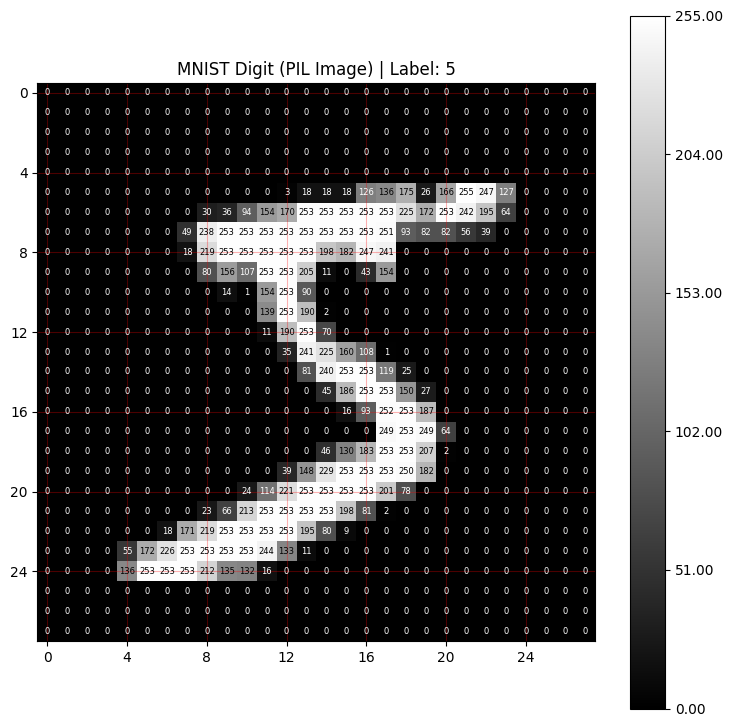

In [8]:
# Visualize the sample image and its corresponding label
helper_utils.display_image(image_pil, label, "MNIST Digit (PIL Image)", show_values=True)

In [9]:
# Convert images to tensors and normalize pixel values
# Pixel values are scaled to [0, 1] and then standardized to mean 0 and std 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

In [10]:
train_dataset = torchvision.datasets.MNIST(
    root=data_path,     # Path to the directory where the data is/will be stored
    train=True,         # Specify that you want the training split of the dataset
    download=True,      # Download the data if it's not found in the root directory
    transform=transform # Apply the defined transformations to each image
)

In [11]:
# Access the first item again
image_tensor, label = train_dataset[0]

print(f"Image Type:                   {type(image_tensor)}")
# Since the `image` is now a PyTorch Tensor, its dimensions are accessed using the .shape attribute.
print(f"Image Shape After Transform:  {image_tensor.shape}")
print(f"Label Type:                   {type(label)}")
print(f"Label value:                  {label}")

Image Type:                   <class 'torch.Tensor'>
Image Shape After Transform:  torch.Size([1, 28, 28])
Label Type:                   <class 'int'>
Label value:                  5


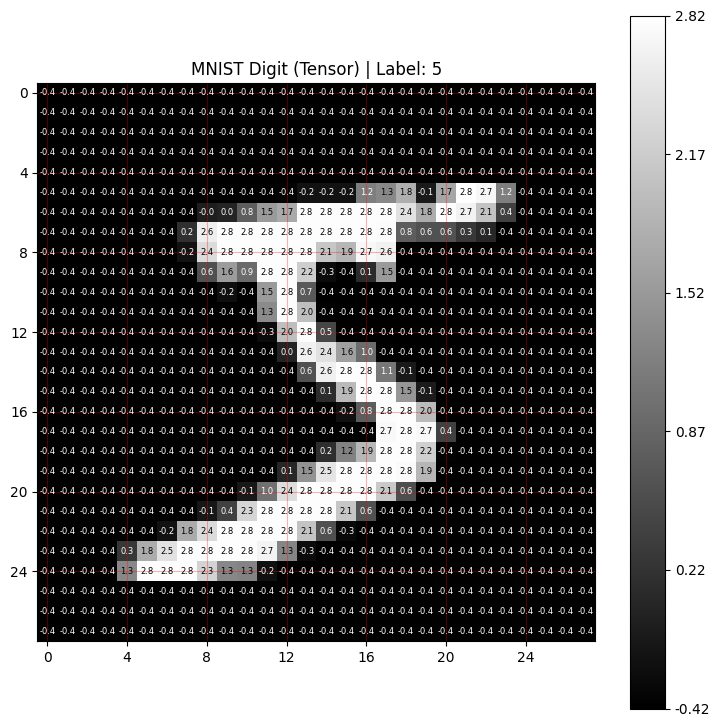

In [12]:
# Visualize the transformed image and its label
helper_utils.display_image(image_tensor, label, "MNIST Digit (Tensor)", show_values=True)

In [13]:
test_dataset = torchvision.datasets.MNIST(
    root=data_path,     # Path to the directory where the data is/will be stored
    train=False,        # Specify that you want the testing split of the dataset
    download=True,      # Download the data if it's not found in the root directory
    transform=transform # Apply the defined transformations to each image
)

In [14]:
# Create a data loader for the training set with shuffling enabled
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create a data loader for the test set with a larger batch size and no shuffling
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [ ]:
class SimpleMNISTDNN(nn.Module):
    """
    A simple deep neural network model for the MNIST dataset.

    This model consists of a flatten layer followed by two linear layers
    with a ReLU activation function. It is designed for classification tasks
    on 28x28 grayscale images.
    """
    def __init__(self):
        """
        Initializes the layers of the neural network.
        """
        super(SimpleMNISTDNN, self).__init__()
        # Initializes a layer to flatten the input tensor.
        # 28x28 input image to a 784-dimensional vector.
        self.flatten = nn.Flatten()
        # Initializes the sequential layers of the neural network
        self.layers = nn.Sequential(
            # Defines the first linear layer with 784 input features and 128 output features.
            nn.Linear(784, 128),
            # Applies the rectified linear unit activation function.
            nn.ReLU(),
            # Defines the second linear layer with 128 input features and 10 output features.
            nn.Linear(128, 10)
        )

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Args:
            x: The input tensor.

        Returns:
            The output tensor after passing through the network layers.
        """
        # Flattens the input tensor.
        x = self.flatten(x)
        # Passes the flattened tensor through the sequential layers.
        x = self.layers(x)
        return x    

In [ ]:
# Initialize the neural network model
model = SimpleMNISTDNN()

# Define the loss function, suitable for multi-class classification
loss_function = nn.CrossEntropyLoss()
##

# Set up the Adam optimizer to update the model's parameters with a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)